In [297]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from random import randint
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
import itertools
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Let's get the useful libraries 
Above are the libraries used in this project to predict the cases of stroke

# What are the objectives of the work 
* Build a neural net using tensorflow
* Get an accuracy bigger than 90 % 
* Can we do it ? 

In [298]:
df = pd.read_csv(r'../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [299]:
#starting an EDA
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [300]:
#looking only at the persons who does not had a stroke
not_stroke = df.loc[(df['stroke']==0)]
not_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


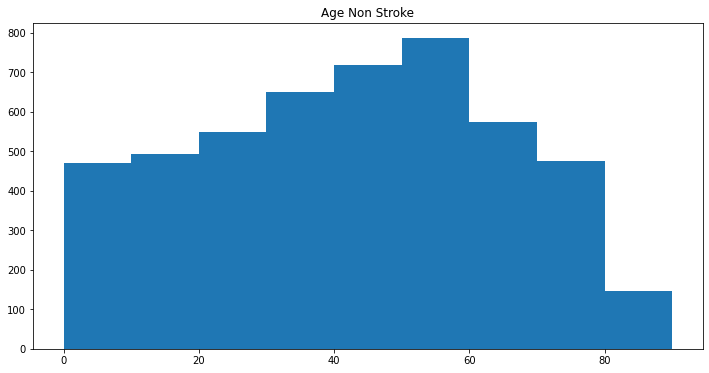

In [301]:
#looking at the age of the persons 
plt.figure(figsize = (12,6))
plt.title('Age Non Stroke')
plt.hist(not_stroke['age'],bins = range(0,100,10))
plt.show()

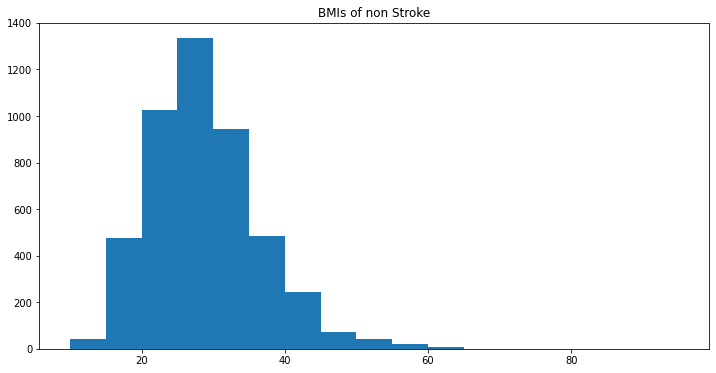

In [302]:
#looking at bmis 

bmis = not_stroke['bmi']
plt.figure(figsize=(12,6))
plt.title('BMIs of non Stroke')
plt.hist(bmis,bins = range(10,int(1+ max(list(bmis))),5))
plt.show()

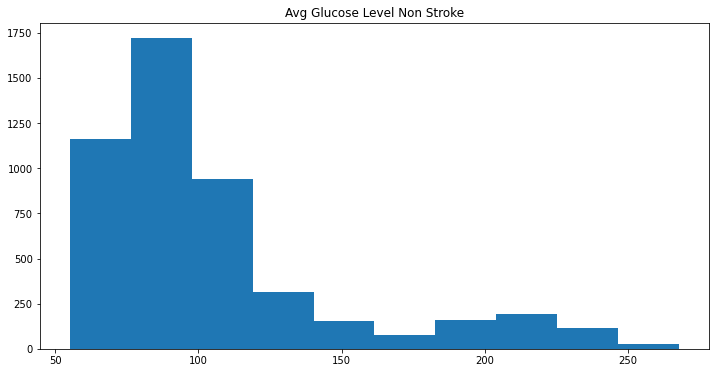

In [303]:
glucose = not_stroke['avg_glucose_level'] 
plt.figure(figsize=(12,6))
plt.title('Avg Glucose Level Non Stroke')
plt.hist(glucose)
plt.show()

<AxesSubplot:title={'center':'Gender Non Stroke'}>

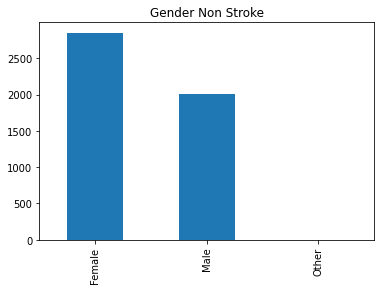

In [304]:
plt.title('Gender Non Stroke')
not_stroke.gender.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Hypertension Non Stroke'}>

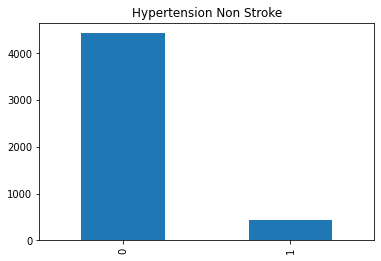

In [305]:
plt.title('Hypertension Non Stroke')
not_stroke.hypertension.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Heart disease Non Stroke'}>

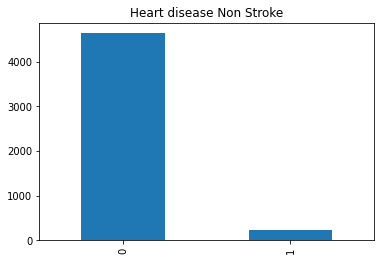

In [306]:
plt.title('Heart disease Non Stroke')
not_stroke.heart_disease.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Ever Married Non stroke'}>

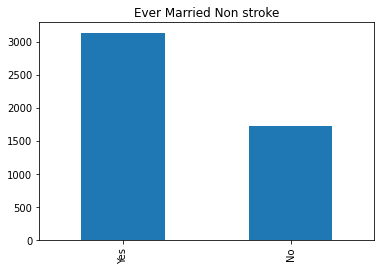

In [307]:
plt.title('Ever Married Non stroke')
not_stroke.ever_married.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Work type Non Stroke'}>

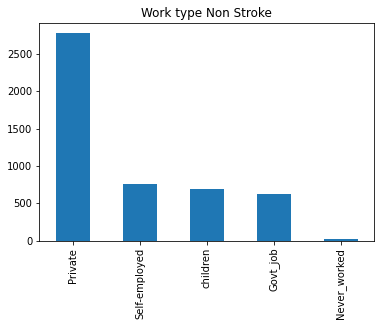

In [308]:
plt.title('Work type Non Stroke')
not_stroke.work_type.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Residence type Non Stroke'}>

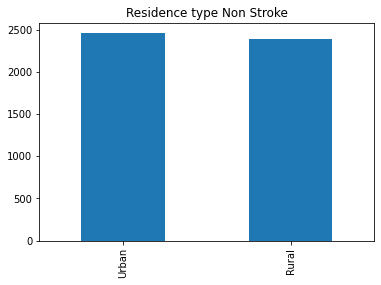

In [309]:
plt.title('Residence type Non Stroke')
not_stroke.Residence_type.value_counts().plot(kind = 'bar')

Now looking at the cases of Stroke

In [310]:
stroke = df.loc[(df['stroke']==1)]
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


(array([ 1.,  1.,  0.,  6., 12., 48., 47., 94., 40.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 9 artists>)

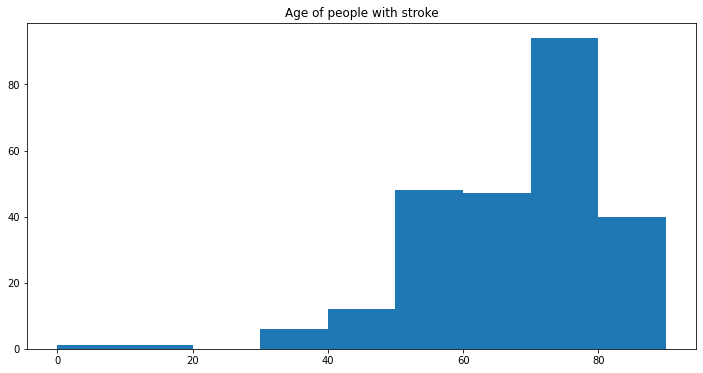

In [311]:
age = stroke['age']
plt.figure(figsize =(12,6))
plt.title("Age of people with stroke")
plt.hist(age,bins = range(0,100,10) )
# removing outliers 


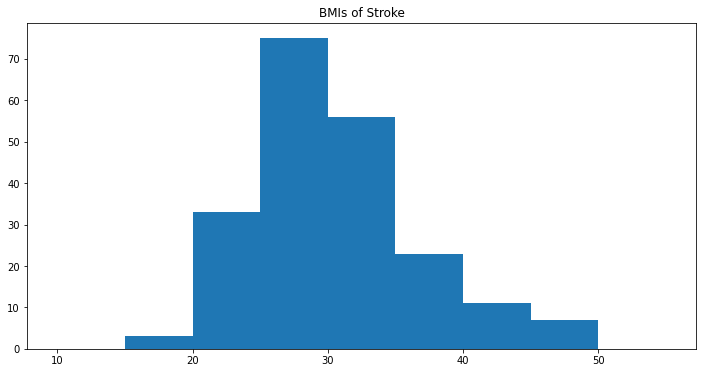

In [312]:
bmis = stroke['bmi']
plt.figure(figsize=(12,6))
plt.title('BMIs of Stroke')
plt.hist(bmis,bins = range(10,int(1+ max(list(bmis))),5))
plt.show()

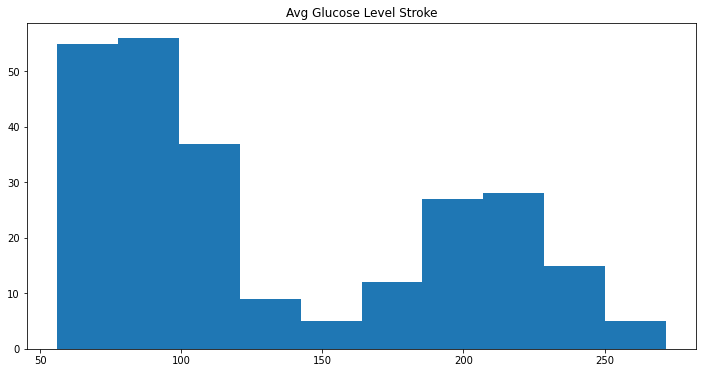

In [313]:
glucose = stroke['avg_glucose_level'] 
plt.figure(figsize=(12,6))
plt.title('Avg Glucose Level Stroke')
plt.hist(glucose)
plt.show()

<AxesSubplot:title={'center':'Gender Stroke'}>

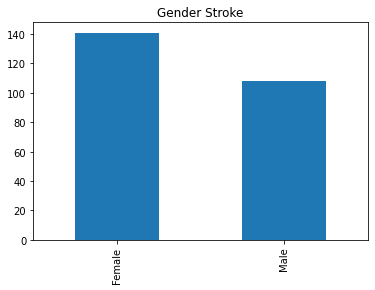

In [314]:
plt.title('Gender Stroke')
stroke.gender.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Hypertension Stroke'}>

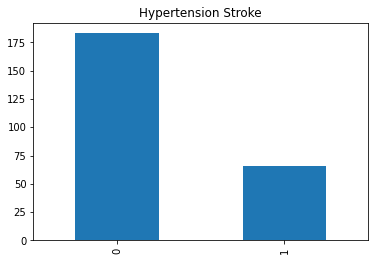

In [315]:
plt.title('Hypertension Stroke')
stroke.hypertension.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Heart disease Stroke'}>

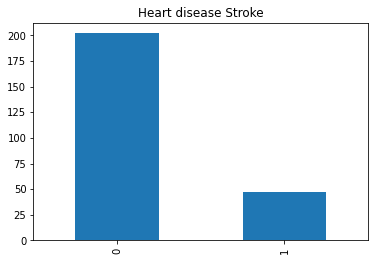

In [316]:
plt.title('Heart disease Stroke')
stroke.heart_disease.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Ever Married Stroke'}>

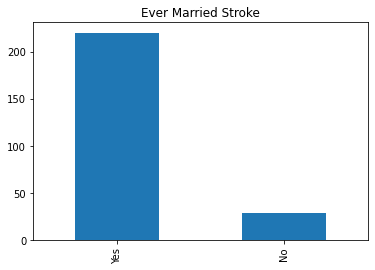

In [317]:
plt.title('Ever Married Stroke')
stroke.ever_married.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Work type Stroke'}>

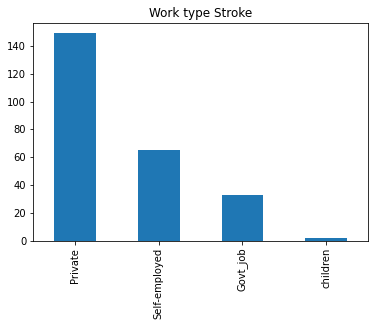

In [318]:
plt.title('Work type Stroke')
stroke.work_type.value_counts().plot(kind = 'bar')

<AxesSubplot:title={'center':'Residence type Stroke'}>

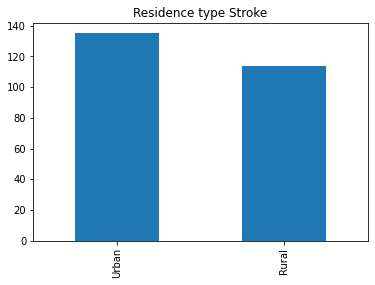

In [319]:
plt.title('Residence type Stroke')
stroke.Residence_type.value_counts().plot(kind = 'bar')

# Organizing the data 
* What categories we have in the data ? 
* What categorical data do we have ?
* How we are going to deal with categorical data ? 
# Dealing with categorical data 
* We are going to use label encoding 
* What the hell is label encoding ? 
Imagine that you have the simple categorical data that are divided in 3 categories we are going to change each category with an integer. Simple.
* Why are we using label encoding ? 
 One of the reasons is the simplicity of it. 
* Do we have other alternatives ? 
 Yes we do. Such as Onehot encoding and others but they are more difficult to apply feel free to make any changes on the notebook 
 
 


In [320]:
df.pop('id')
def arrume(df,tipo):
    unicos = np.unique(df[tipo])
    df[tipo] = df[tipo].map(dict(zip(unicos,range(len(unicos)))))



arrume(df,'work_type')
arrume(df,'gender')
arrume(df,'smoking_status')
arrume(df,'Residence_type')
arrume(df,'ever_married')


# Do we have NaN ? 
* Yes we do !!!
* Where? 
* How to fix this without losing data ? 

 

In [321]:
print (df.isna().any(axis=0))

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool


# Fixing our problems with Nan 
* We only have Nan in the BMI part of the data. 
* We are going to change the Nan with the average of the BMIs. 


In [322]:
df['bmi']= df['bmi'].fillna(np.mean(df['bmi']))

# Removing Outliers 
 We have outliers in the dataframe we need to remove so we can get better results

In [323]:
q_low = df["age"].quantile(0.01)
q_hi  = df["age"].quantile(0.99)

df = df[(df["age"] < q_hi) & (df["age"] > q_low)]

# Is the Data balanced ? 
 - A hint. It's not. 
 - No lets see how the data is organized.
 - How many of the data is cases of stroke ? How many are not ? 

In [324]:
#see data if it is balanced 
total = len(df['stroke'])
is_stroke = list(df['stroke']).count(1)
print(f'Number of negative cases {total-is_stroke}')
print(f'Number of positive cases {is_stroke}')
#hint is not balanced 

Number of negative cases 4758
Number of positive cases 240


# Why can't we just use the data as it is ? 
We have a problem. The data is not balanced. But what this means ? It means we have a lot of negatives and few positives cases of stroke. If we use the way it is, our model would predict, much likely, that all cases are not strokes and thats not what we want. 
But OMG what we can do to solve this problem ? The answer is undersampling or oversampling. But what the hell is undersampling and oversampling ?
* Undersampling : is reducing the amount of data with random cases of not stroke(negatives), in our case,  and all cases of strokes (positives) this way we have a balanced dataset. 
* Oversampling : Is raising the amount of cases of stroke (positives) and keeping the number of negatives there are different ways you can do this.  


In [325]:
y = df.pop('stroke')
x = df.values
y =np.array(y)

#undersampling with random data 
x_under = []
y_under = []

while len(y_under)<240:
    i = randint(0,len(x)-1)
    if y[i]==0:
        x_under.append(x[i])
        y_under.append(0)
for i in range(len(y)):
    if y[i]==1:
        x_under.append(x[i])
        y_under.append(1)
print(f'Number of strokes: {y_under.count(1)}\nNumber of non-Strokes : {y_under.count(0)}')
x_under,x_test_u,y_under,y_test_u = train_test_split(x_under,y_under,test_size=0.1)
x_over,x_test_o,y_over,y_test_o = train_test_split(x,y,test_size=0.3)    

Number of strokes: 240
Number of non-Strokes : 240


We are undersampling using random numbers so we can get random data from the negatives (non strokes) 

In [326]:
#doing oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x_over, y_over)


counter=(np.count_nonzero(y_over))

print(f'Number of strokes : {counter}\nNumber of non-strokes : {len(y_over)-counter}')

Number of strokes : 3335
Number of non-strokes : 3335


In [327]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


The function above was taken out of the site: https://deeplizard.com/learn/video/km7pxKy4UHU

# NOW FINALLY A NEURAL NET !!!!!!!

Below we can see the model in tensorflow that we are using.
We create the sequential model and compile it.

In [328]:
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(10,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
historico = model.fit(np.array(x_under),np.array(y_under),epochs = 300,validation_split = 0.1,verbose = 0)


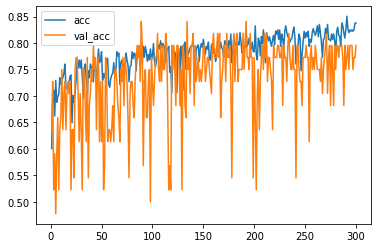

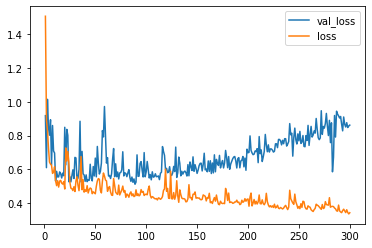

In [329]:
val=historico.history
plt.figure(0)
plt.plot(np.arange(1,len(val['accuracy'])+1),val['accuracy'],label='acc')
plt.plot(np.arange(1,len(val['val_accuracy'])+1),val['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(np.arange(1,len(val['val_loss'])+1),val['val_loss'],label='val_loss')
plt.plot(np.arange(1,len(val['val_loss'])+1),val['loss'],label='loss')
plt.legend()
plt.show()

Above are the results of the loss and accuracy of the training process of the model. 

In [330]:
def arrume2(x):
    x = np.array(x)
    return x
    

Confusion matrix, without normalization
[[18  6]
 [10 14]]


[]

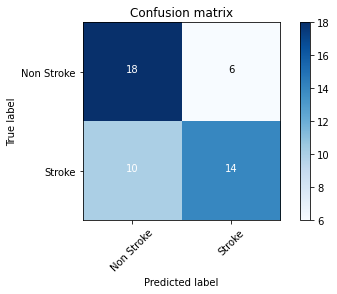

In [331]:
x_test_u = arrume2(x_test_u)
x_test_o = arrume2(x_test_o)
comp = model.predict(x_test_u)
comp = [np.argmax(l) for l in comp]
cm = confusion_matrix(y_true= y_test_u, y_pred=comp)
plot_confusion_matrix(cm=cm, classes = ['Non Stroke','Stroke'])
plt.plot()

* Now the same model but being trained with oversampled data 

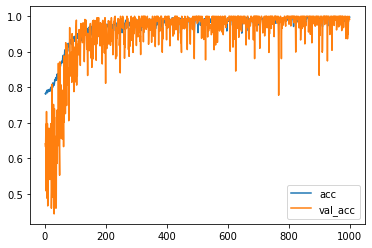

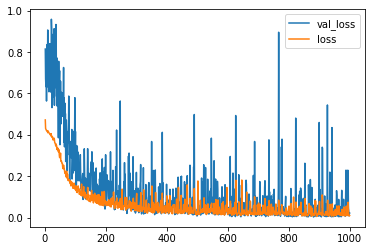

In [332]:
#retraining the model with the oversample
historico = model.fit(np.array(x_over),np.array(y_over),epochs=1000,validation_split = 0.3,verbose =0)
val=historico.history
plt.figure(0)
plt.plot(np.arange(1,len(val['accuracy'])+1),val['accuracy'],label='acc')
plt.plot(np.arange(1,len(val['val_accuracy'])+1),val['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(np.arange(1,len(val['val_loss'])+1),val['val_loss'],label='val_loss')
plt.plot(np.arange(1,len(val['val_loss'])+1),val['loss'],label='loss')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[1384   39]
 [  71    6]]


[]

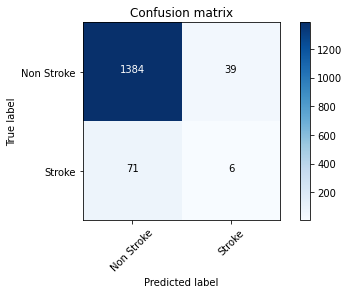

In [333]:
comp = model.predict(np.array(x_test_o))
comp = [np.argmax(l) for l in comp]
cm = confusion_matrix(y_true=y_test_o, y_pred=comp)
plot_confusion_matrix(cm=cm, classes = ['Non Stroke','Stroke'])
plt.plot()

Lets test the model with 100 cases of stroke and 100 cases of not stroke let's see what is the f1 score. 

In [334]:
x_100 = []
y_100 = [] 
for i in range(len(y)):
    if y[i]==1:
        y_100.append(1)
        x_100.append(x[i])
    if len(y_100)==100:
        break
while len(y_100)<200:
    i = randint(0,len(x)-1)
    if y[i]==0:
        y_100.append(0)
        x_100.append(x[i])

x_100 = np.array(x_100)
y_100 = np.array(y_100)

Confusion matrix, without normalization
[[99  1]
 [31 69]]


[]

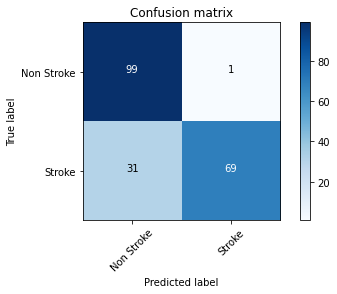

In [337]:
comp = model.predict(np.array(x_100))
comp = [np.argmax(l) for l in comp]
cm = confusion_matrix(y_true=y_100, y_pred=comp)
plot_confusion_matrix(cm=cm, classes = ['Non Stroke','Stroke'])
plt.plot()

# Results
The F-score of the model gets compromised given the low number of positives in the test set so the number of negatives is very high. 
The mistake i was making that let the f1 Score be to high and was showed by Vmaia is that i waas oversampling the raw data and testing it with the raw data, but given the nature of the problem the f1 score is low. if we do in an balanced dataset the prediction is better but there are still a lot of room for improvement please let me know what i ca n imporve

We can see that the oversampled data have a better f1 score but i am a little bit suspicious about it because he is to high if you can see some mistake please show me  

**Thank you for your attention and if you liked the notebook give it an up, also put your ideas and if i made it some mistake say it on the comments **